<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 05:  Deep neural networks**

## **Outline**

1. [Ejercicio 1. DNN-classification](#eje1)
2. [Ejercicio 2. DNN-classification](#eje2)
3. [Ejercicio 3. DNN-Regression](#eje3)





In [1]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ai-uis-student/talleres20211')

print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student/talleres20211


---
#### - Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.

#### - Para este notebook es recomendable usar la **GPU**. Por favor verifique que este habilitada la GPU en `Editar-> Configuración del notebook->Acelerador de hardware (Opcion GPU)`
---

# **Ejercicio 1: DNN classification**  <a name="eje1"></a>

Escriba una función que reciba un conjunto de datos etiquetados (X,y) y entrene una red neuronal, con la siguiente configuración: 
- Una capa de entrada con la dimensión de cada muestra $x_i$
- Cuatro capas intermedias  de 128, 64, 32, 16 neuronas y activaciones `elu`
- Una capa de salida _softmax_ con el número de clases $y$. Las clases cada vez que se llama pueden cambiar su número.

- Las redes neuronales deben ser entrenadas con unpitimizador SGD,  epochs=50,  batch_size=32, y regla de minimización: `sparse_categorical_crossentropy`

- La función debe retornar las etiquetas estimadas para el x_test, el accuracy obtenido en test y el modelo entrenado. 



In [2]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas

def fun_51012821(X_train, X_test, y_train, y_test):
  import numpy as np
  import tensorflow as tf
  import numpy as np
  import tensorflow as tf
  from tensorflow import keras
#   Una capa de entrada con la dimensión de cada muestra xi

# Cuatro capas intermedias de 128, 64, 32, 16 neuronas y activaciones elu

# Una capa de salida softmax con el número de clases y. Las clases cada vez que se llama pueden cambiar su número.

  dnn1 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(X_train[0].shape) ),
    tf.keras.layers.Dense(128, activation=tf.nn.elu),
    tf.keras.layers.Dense(64, activation=tf.nn.elu),
    tf.keras.layers.Dense(32, activation=tf.nn.elu),
    tf.keras.layers.Dense(16, activation=tf.nn.elu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
    ])   
  
#   Las redes neuronales deben ser entrenadas con unpitimizador SGD, epochs=50, batch_size=32, y regla de minimización: sparse_categorical_crossentropy

# La función debe retornar las etiquetas estimadas para el x_test, el accuracy obtenido en test y el modelo entrenado.

  dnn1.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  dnn1.fit(X_train, y_train, epochs=50, batch_size=32)
  test_loss, test_acc = dnn1.evaluate(X_test, y_test)
  prediction = dnn1.predict(X_test)
  yest1 = np.argmax(prediction, axis = 1) 
  return yest1, test_acc, dnn1




import urllib.parse, inspect
src51012821 = urllib.parse.quote_plus(inspect.getsource(fun_51012821))

(10000, 100) (10000,) (9000, 100) (9000,)
Epoch 1/50
282/282 [==============================] - 4s 3ms/step - loss: 1.5691 - accuracy: 0.3358
Epoch 2/50
282/282 [==============================] - 1s 3ms/step - loss: 1.3457 - accuracy: 0.4471
Epoch 3/50
282/282 [==============================] - 1s 3ms/step - loss: 1.2394 - accuracy: 0.4997
Epoch 4/50
282/282 [==============================] - 1s 3ms/step - loss: 1.1448 - accuracy: 0.5543
Epoch 5/50
282/282 [==============================] - 1s 3ms/step - loss: 1.0548 - accuracy: 0.5928
Epoch 6/50
282/282 [==============================] - 1s 3ms/step - loss: 0.9696 - accuracy: 0.6338
Epoch 7/50
282/282 [==============================] - 1s 3ms/step - loss: 0.8929 - accuracy: 0.6683
Epoch 8/50
282/282 [==============================] - 1s 3ms/step - loss: 0.8242 - accuracy: 0.6906
Epoch 9/50
282/282 [==============================] - 1s 3ms/step - loss: 0.7590 - accuracy: 0.7227
Epoch 10/50
282/282 [==============================] - 1s 

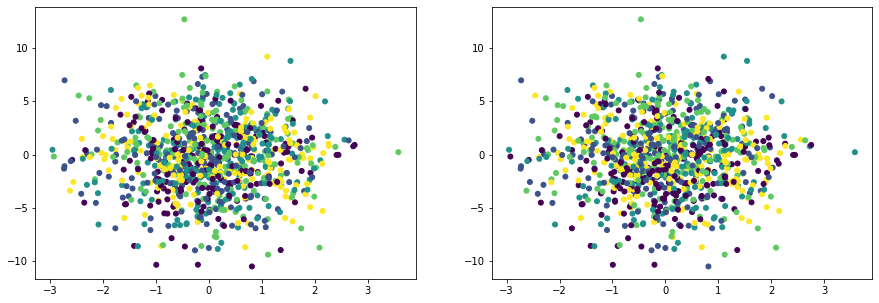

In [3]:
#@title **verifique su respuesta**
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


tf.random.set_seed(23)
np.random.seed(23)

X, y = make_classification(n_samples= 10000, n_features=100, n_redundant=0,\
                             n_classes=5, n_clusters_per_class=5,n_informative=32)

test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
print(X.shape, y.shape, X_train.shape,y_train.shape)

yest1, test_acc, dnn1 = fun_51012821(X_train, X_test, y_train, y_test)

print("accuracy obtenido: ", test_acc)
print(y_test.shape, yest1.shape)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, s=25)
ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=yest1, s=25)


In [4]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS5_51012821 $src51012821

(1000, 20) (1000,) (700, 20) (700,)
2021-09-28 02:44:44.333624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:44:44.354606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:44:44.355323: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:44:44.356544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:44:44.357277: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:9

# **Ejercicio 2: DNN classification**  <a name="eje2"></a>

Observe el comportamiento de las arquitecturas neuronales, condicionadas con diferentes parametros para el entrenamiento. Escriba una función que cree instancias de la red neuronal (escrita dentro de la función) y la entrene con los siguientes tres parametros de aprendizaje $\alpha = [0.1, 0.001, 0.00001]$, respectivamente. 

- Las redes neuronales deben ser entrenadas con unpitimizador SGD,  epochs=50,  batch_size=32, y regla de minimización: `sparse_categorical_crossentropy`

- La función debe retornar la historia de entrenamiento `fit` y los tres modelos entrenados

  

In [5]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas

def fun_52012821(X_train, X_test, y_train, y_test):
  import numpy as np
  import tensorflow as tf
  from tensorflow import keras
  def model_dnn():
    dnn = keras.models.Sequential([
                                    keras.layers.Flatten( input_shape= (X_train[0].shape)),
                                    keras.layers.Dense(64, activation=tf.nn.relu),
                                    keras.layers.Dense(64, activation=tf.nn.relu),
                                    keras.layers.Dense(3, activation=tf.nn.softmax)
                                    ])
    return dnn
  
  # Las redes neuronales deben ser entrenadas con unpitimizador SGD, epochs=50, batch_size=32, y regla de minimización: sparse_categorical_crossentropy
  dnn1_lr1 = model_dnn()
  dnn1_lr1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  dnn1_lr2 = model_dnn()
  dnn1_lr2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  dnn1_lr3 = model_dnn()
  dnn1_lr3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  # La función debe retornar la historia de entrenamiento fit y los tres modelos entrenados

  hist1 = dnn1_lr1.fit(X_train, y_train, epochs=50, batch_size=32)
  hist2 = dnn1_lr2.fit(X_train, y_train, epochs=50, batch_size=32)
  hist3 = dnn1_lr3.fit(X_train, y_train, epochs=50, batch_size=32)

  return hist1, hist2, hist3, dnn1_lr1, dnn1_lr2, dnn1_lr3



import urllib.parse, inspect
src52012821 = urllib.parse.quote_plus(inspect.getsource(fun_52012821))

(10000, 100) (10000,) (9000, 100) (9000,)
Epoch 1/50
282/282 [==============================] - 1s 3ms/step - loss: 0.7904 - accuracy: 0.6542
Epoch 2/50
282/282 [==============================] - 1s 3ms/step - loss: 0.5321 - accuracy: 0.7831
Epoch 3/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4217 - accuracy: 0.8340
Epoch 4/50
282/282 [==============================] - 1s 3ms/step - loss: 0.3475 - accuracy: 0.8627
Epoch 5/50
282/282 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.8822
Epoch 6/50
282/282 [==============================] - 1s 3ms/step - loss: 0.2565 - accuracy: 0.9049
Epoch 7/50
282/282 [==============================] - 1s 3ms/step - loss: 0.2229 - accuracy: 0.9159
Epoch 8/50
282/282 [==============================] - 1s 3ms/step - loss: 0.1930 - accuracy: 0.9243
Epoch 9/50
282/282 [==============================] - 1s 3ms/step - loss: 0.1659 - accuracy: 0.9389
Epoch 10/50
282/282 [==============================] - 1s 

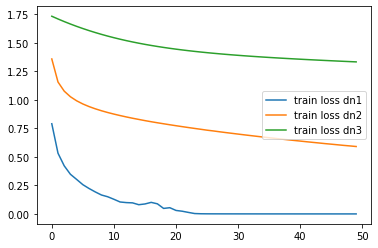

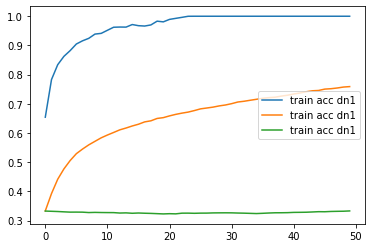

In [6]:
#@title **verifique su respuesta**
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


tf.random.set_seed(23)
np.random.seed(23)

X, y = make_classification(n_samples= 10000, n_features=100, n_redundant=0,\
                             n_classes=3, n_clusters_per_class=5,n_informative=32)

test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
print(X.shape, y.shape, X_train.shape,y_train.shape)

hist1, hist2, hist3, dnn1_lr1, dnn1_lr2, dnn1_lr3 = fun_52012821(X_train, X_test, y_train, y_test)

plt.plot(hist1.history['loss'], label='train loss dn1');
plt.plot(hist2.history['loss'], label='train loss dn2');
plt.plot(hist3.history['loss'], label='train loss dn3');
plt.legend(); plt.show();

plt.plot(hist1.history['accuracy'], label='train acc dn1');
plt.plot(hist2.history['accuracy'], label='train acc dn1');
plt.plot(hist3.history['accuracy'], label='train acc dn1');
plt.legend(); plt.show()

In [7]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS5_52012821 $src52012821

(1000, 20) (1000,) (700, 20) (700,)
2021-09-28 02:48:28.447762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:48:28.457326: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:48:28.458283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:48:28.459737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:48:28.460667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:9

# **Ejercicio 3: DNN regression**  <a name="eje2"></a>

Vamos a utilizar ahora las DNN para resolver problemas de regresión. La principal diferencia en estas arquitecturas esta en la capa de salida. En este caso solo debemos tener una neurona sin activación que nos permita dar una respuesta en terminos de la escala de los datos. Implemente una función que. 

- Carge los datos de _Boston house price prediction_ que están en [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston). Utilice la información de tamaño de las caracteristicas para definir la capa inicial. **NO haremos partición de los datos en train y test**

- Cree una red neuronal que reciba en la capa de entrada **todas las caracteristicas del dataset** y además tenga tres capas intermedias de 64, 32, 10 neuronas, respectivamente. Las activaciones para la capa intermedia debe ser tangente hiperpolica.

- Las redes neuronal deben ser entrenada con unpitimizador RMSprop,  epochs=50,  batch_size=32, y regla de minimización: `'mse'` y metrica de evaluación `'mse'`

- La función debe retornar: los valores originales de $y$, los valores estimados de $y$ y el  modelo entrenado


In [8]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas

def fun_53012821():
  import numpy as np
  from sklearn.datasets import load_boston
  import tensorflow as tf
  from tensorflow import keras
  X, y = load_boston(return_X_y=True)


# Carge los datos de Boston house price prediction que están en sklearn. Utilice la información de tamaño de las caracteristicas para definir la capa inicial. NO haremos partición de los datos en train y test

# Cree una red neuronal que reciba en la capa de entrada todas las caracteristicas del dataset y además tenga tres capas intermedias de 64, 32, 10 neuronas, respectivamente. Las activaciones para la capa intermedia debe ser tangente hiperpolica.


  dnnr = keras.models.Sequential([
                                    keras.layers.Flatten( input_shape= (X[0].shape)),
                                    keras.layers.Dense(64, activation=tf.nn.tanh),
                                    keras.layers.Dense(32, activation=tf.nn.tanh),
                                    keras.layers.Dense(10, activation=tf.nn.tanh),
                                    keras.layers.Dense(1)
                                    ])
  # Las redes neuronal deben ser entrenada con unpitimizador RMSprop, epochs=50, batch_size=32, y regla de minimización: 'mse' y metrica de evaluación 'mse'
  dnnr.compile(optimizer=tf.keras.optimizers.RMSprop(),loss='MSE',metrics=['mean_squared_error'])
  dnnr.fit(X, y, epochs=50, batch_size=32)
  yest = dnnr.predict(X)
  # La función debe retornar: los valores originales de y, los valores estimados de y y el modelo entrenado

  return y, yest, dnnr


import urllib.parse, inspect
src53012821 = urllib.parse.quote_plus(inspect.getsource(fun_53012821))

Epoch 1/50
16/16 [==============================] - 1s 4ms/step - loss: 489.6759 - mean_squared_error: 489.6759
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 438.1525 - mean_squared_error: 438.1525
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 425.5307 - mean_squared_error: 425.5307
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 416.9471 - mean_squared_error: 416.9471
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 409.5983 - mean_squared_error: 409.5983
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 402.8219 - mean_squared_error: 402.8219
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 396.2940 - mean_squared_error: 396.2940
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 390.0107 - mean_squared_error: 390.0107
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 383.9039 - mean_squared_error: 3

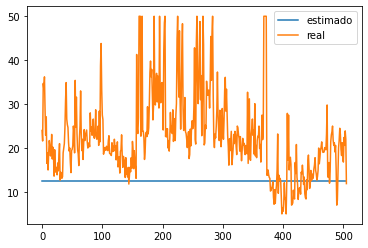

In [9]:
#@title **verifique su respuesta**
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


tf.random.set_seed(23)
np.random.seed(23)

y, yest, dnnr= fun_53012821()
plt.plot(yest, label='estimado');
plt.plot(y, label='real');
plt.legend(); plt.show()

In [ ]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS5_53012821 $src53012821

2021-09-28 02:50:04.086515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:50:04.102604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:50:04.103379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:50:04.104573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 02:50:04.105266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#@title **1. Complete la siguiente información:**
taller_name = "Taller_prof_05_20202" #@param {type:"string"}
codigo_name = "tl5_12345" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

Taller_prof_02_20202 tl2_12345


In [ ]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [ ]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

uno: tl2_12345 dos Taller_prof_02_20202
¡PERFECTO!, el archivo   'tl2_12345.ipynb'   se creó correctamente :D


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>